#*Emprendimiento de Carne Bovina en Argentina*#

# **Por Juan Solinas**

#Motivación y audiencia

En el siguiente Notebook se analizaran los datos de las actividades ganaderas. El dataset utilizado contiene una serie de datos extraídos del sector bovino de Argentina, correspondientes a las ventas realizadas entre 2015 y 2018. Este sector productivo del país es uno de los más importantes, que tiende a generar un valor agregado en sus exportaciones que se reinvierte nuevamente aquí. Conocer los lugares de mayor exportación y las formas en las que se produce la mayor cantidad de carne bovina, así como poder predecir como se desenvolvera en el futruo tal producción, puede servir como información tanto para una estrategia de negocios que pretenda introducirse en este mercado. También, esta información podría servir para instituciones gubernamentales que pretendan conformar una estrategia con miras a aumentar su importancia en el mercado mundial.


En la propuesta de este notebook particular, se llevara adelante una propuesta de negocio (de manera ficticia) a un grupo inversionista interesado en invertir en esta area productiva del país. Para ello, se buscara identificar que actividad es la más rentable para una inversión fructifera a corto y largo plazo.  


URL de donde se extrajo el dataset: [Producción de Carne Bovina](https://www.kaggle.com/datasets/anggyelarez/produccin-de-carne-bovina-en-argentina)

#Analisis exploratorio e hipotesis

Como primer paso exploratorio, en este notebook se intentara detectar la existencia de cierta tendencia a una mayor cantidad de ingresos y de producción de Kg de carne por hectarea según la provincia y el tipo de actividad con la cual se desarrolla esta producción. Además, se intentara descubrir que actividades predominan en el país.

La hipotesis es que se podrá predecir una mayor ingreso neto en los siguientes años para la suma total de actividades basadas en la cría de carne bovina en comparación con los otros tipos de actividad.  

Como propuesta adicional, se buscara considerar algún tipo de estrategia para una inversión de largo plazo en este sector productivo, partiendo de ganancias a corto plazo que permitan implementar una inversión duradera.




#**Glosario de Variables del dataset utilizado**


1.   País

2.   Provincia

3.   Departamento: Localidad de la provincia de la que se trata)

4.   Año

5.   Modelo: Tipo de modelo de producción de carne que se implementa)

6.   Actividad: Tipo de actividad en la cual se produce la Carne Bovina)

7.  Margen Bruto ($/Ha): Total de ganancia por hectarea sin contar los costos indirectos.

8. Resultado neto ($/ha): Total de ganancia total por hectarea, luego de descontados todos los gastos.

9. Ingreso neto ($/ha): Total de ingresos percibidos por hectarea, calculando las ventas de la carne producida sin descontar los costos.

10. Gastos directos ($/ha): Costos de producción por hectarea, sin contar gastos externos a la empresa.

11. Costos indirectos ($/ha): Costos indirectos por hectarea, calculando solo los gastos ajenos a la empresa, como impuestos, etc.

12. Eficiencia stock(%):  Estimación de los kg de producción que se extraen para la venta por cada 100 kg de existencia. Es un porcentaje sobre el total de lo producido.

13. Producción (kg/ha): Cantidad de Kg de carne bovina producidos por hectarea de la empresa.

14. Carga (kg/ha): Es la cantidad total de animales por hectarea, calculada en una sumatoria de kg por hectarea.



**ACLARACIÓN**

--La denominación "Ha" es una abreviación de Hectareas.

--Los tipos de actividad son:

Cria: Se basa en la cria de Vacas para que tengan terneros y de ahí producir carne bovina.

Ciclo completo: Se basa en la cria de vacas para que tengan terneros y además de desarrollar su alimentación con miras a engordar a los animales para vender la carne bovina.

Invernada: Se basa en la alimentación de los terneros para vender la carne bovina.

#Estructuración de los datos

In [1]:
#Importación de CSV de GitHub
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/JuanSol26/Coderhouse-Solinas/main/produccion-de-carne-bovina%20(1).csv"

df_carne = pd.read_csv (url,  encoding='ISO-8859-1', sep= ";")


In [2]:
#Renombro las columnas y clasifico 4 para poder eliminarlas.
df_carne = df_carne.rename(columns= {"pais": "País", "provincia": "Provincia", "departamento": "Departamento", "año": "Año", "margen_bruto_($/ha)" : "Margen bruto ($/ha)", "resultado_neto_($/ha)": "Resultado neto ($/ha)", "ingreso_neto_($/ha)": "Ingreso neto ($/ha)", "gastos_directos_($/ha)": "Gastos directos ($/ha)", "costos_indirectos_($/ha)": "Costos indirectos ($/ha)", "eficiencia_stock_(%)": "Eficiencia stock(%)","producción_(kg/ha)": "Producción (kg/ha)", "destete_(%)": "Eliminar1", "carga_(kg/ha)": "Carga (kg/ha)", "Unnamed: 15": "Eliminar2", "Unnamed: 16": "Eliminar3", "Unnamed: 17": "Eliminar4"})


In [3]:
df_carne.head()

,País,Provincia,Departamento,Año,modelo,actividad,Margen bruto ($/ha),Resultado neto ($/ha),Ingreso neto ($/ha),Gastos directos ($/ha),Costos indirectos ($/ha),Eficiencia stock(%),Producción (kg/ha),Eliminar1,Carga (kg/ha),Eliminar2,Eliminar3,Eliminar4
0,Argentina,Buenos Aires,Bolivar,2018,buenos aires centro-sudoeste,ciclo completo,1766,-31,3497,1730,1797,35,117,69,336,NaN,NaN,NaN
1,Argentina,Buenos Aires,Daireaux,2018,buenos aires centro-sudoeste,ciclo completo,1766,-31,3497,1730,1797,35,117,69,336,NaN,NaN,NaN
2,Argentina,Buenos Aires,Coronel Suarez,2018,buenos aires centro-sudoeste,ciclo completo,1766,-31,3497,1730,1797,35,117,69,336,NaN,NaN,NaN
3,Argentina,Cordoba,General San Martin,2018,centro cordoba sur,ciclo completo,2045,136,4589,2544,1909,36,157,65,436,NaN,NaN,NaN
4,Argentina,Cordoba,Juarez Celman,2018,centro cordoba sur,ciclo completo,2045,136,4589,2544,1909,36,157,65,436,NaN,NaN,NaN


In [4]:
#Eliminación de columnas que no se utilizaran en el analisis
df_carne = df_carne.drop ("Eliminar1",axis=1)
df_carne = df_carne.drop("Eliminar2", axis=1)
df_carne = df_carne.drop("Eliminar3", axis=1)
df_carne = df_carne.drop("Eliminar4", axis=1)

In [5]:
df_carne.head()

,País,Provincia,Departamento,Año,modelo,actividad,Margen bruto ($/ha),Resultado neto ($/ha),Ingreso neto ($/ha),Gastos directos ($/ha),Costos indirectos ($/ha),Eficiencia stock(%),Producción (kg/ha),Carga (kg/ha)
0,Argentina,Buenos Aires,Bolivar,2018,buenos aires centro-sudoeste,ciclo completo,1766,-31,3497,1730,1797,35,117,336
1,Argentina,Buenos Aires,Daireaux,2018,buenos aires centro-sudoeste,ciclo completo,1766,-31,3497,1730,1797,35,117,336
2,Argentina,Buenos Aires,Coronel Suarez,2018,buenos aires centro-sudoeste,ciclo completo,1766,-31,3497,1730,1797,35,117,336
3,Argentina,Cordoba,General San Martin,2018,centro cordoba sur,ciclo completo,2045,136,4589,2544,1909,36,157,436
4,Argentina,Cordoba,Juarez Celman,2018,centro cordoba sur,ciclo completo,2045,136,4589,2544,1909,36,157,436


In [6]:
df_carne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   País                      2598 non-null   object
 1   Provincia                 2598 non-null   object
 2   Departamento              2598 non-null   object
 3   Año                       2598 non-null   int64 
 4   modelo                    2598 non-null   object
 5   actividad                 2598 non-null   object
 6   Margen bruto ($/ha)       2598 non-null   int64 
 7   Resultado neto ($/ha)     2598 non-null   int64 
 8   Ingreso neto ($/ha)       2598 non-null   int64 
 9   Gastos directos ($/ha)    2598 non-null   int64 
 10  Costos indirectos ($/ha)  2598 non-null   int64 
 11  Eficiencia stock(%)       2598 non-null   int64 
 12  Producción (kg/ha)        2598 non-null   int64 
 13  Carga (kg/ha)             2598 non-null   int64 
dtypes: int64(9), object(5)
m

In [7]:
#modificación de categoría año para que sea considerada como una variable categorica y no como una variable continua.
df_carne["Año"]= df_carne ["Año"].astype("category")

In [8]:
df_carne.describe().round(2)

,Margen bruto ($/ha),Resultado neto ($/ha),Ingreso neto ($/ha),Gastos directos ($/ha),Costos indirectos ($/ha),Eficiencia stock(%),Producción (kg/ha),Carga (kg/ha)
count,2598.00,2598.00,2598.00,2598.00,2598.00,2598.00,2598.00,2598.00
mean,1001.08,414.79,1585.56,584.46,586.32,32.76,78.71,209.24
std,725.41,532.00,1344.48,864.81,486.09,9.40,76.29,134.13
min,-107.00,-1299.00,205.00,46.00,75.00,20.00,7.00,19.00
25%,477.00,119.00,664.00,137.00,241.00,27.00,28.00,101.00
50%,645.00,241.00,1013.00,228.00,401.00,31.00,46.00,182.00
75%,1400.00,750.00,2286.00,423.00,777.00,35.00,92.00,293.00
max,3148.00,1761.00,5980.00,4424.00,2522.00,59.00,284.00,492.00


In [9]:
df_carne.describe(include= "object")

,País,Provincia,Departamento,modelo,actividad
count,2598,2598,2598,2598,2598
unique,1,13,199,21,3
top,Argentina,Buenos Aires,Capital,cuenca del salado,cria
freq,2598,588,60,444,1800


In [10]:
#Cantidad total de unidades productoras por provincia
df_carne.Provincia.value_counts()

Provincia
Buenos Aires           588
Cordoba                312
Chaco                  300
Santiago Del Estero    264
La Pampa               240
Entre Rios             204
Corrientes             190
Salta                  144
Santa Fe               132
San Luis               108
Formosa                 96
Chubut                  12
Rio Negro                8
Name: count, dtype: int64

In [11]:
#Cantidad total de tipos de modelo
df_carne.modelo.value_counts()

modelo
cuenca del salado               444
pampeana subhumeda              276
chaco-formosa este              252
santiago del estero             252
cordoba norte                   180
salta                           144
corrientes noroeste             144
entre rios sw                   132
santa fe centro                 132
la pampa-san luis arida         132
centro cordoba sur              108
chaco humedo                     84
la pampa-san luis semiarida      72
entre rios norte                 60
chaco-formosa oeste              60
corrientes centro sur            40
buenos aires centro-sudoeste     36
corrientes nor-este              18
islas de entre rios 1            12
patagonia - precordillera        12
patagonia - monte oriental        8
Name: count, dtype: int64

In [12]:
#Cantidad total de unidades productoras según su tipo de actividad
df_carne.actividad.value_counts()

actividad
cria              1800
invernada          432
ciclo completo     366
Name: count, dtype: int64

In [13]:
#Creación de variable que calcule los gastos totales
Gastos = df_carne["Gastos directos ($/ha)"] + df_carne["Costos indirectos ($/ha)"]

In [14]:
#Incorporación de variable gastos como columna al DataFrame
df_carne2 = df_carne
df_carne2 = df_carne2.assign (Gastos= Gastos)
df_carne2.head()

,País,Provincia,Departamento,Año,modelo,actividad,Margen bruto ($/ha),Resultado neto ($/ha),Ingreso neto ($/ha),Gastos directos ($/ha),Costos indirectos ($/ha),Eficiencia stock(%),Producción (kg/ha),Carga (kg/ha),Gastos
0,Argentina,Buenos Aires,Bolivar,2018,buenos aires centro-sudoeste,ciclo completo,1766,-31,3497,1730,1797,35,117,336,3527
1,Argentina,Buenos Aires,Daireaux,2018,buenos aires centro-sudoeste,ciclo completo,1766,-31,3497,1730,1797,35,117,336,3527
2,Argentina,Buenos Aires,Coronel Suarez,2018,buenos aires centro-sudoeste,ciclo completo,1766,-31,3497,1730,1797,35,117,336,3527
3,Argentina,Cordoba,General San Martin,2018,centro cordoba sur,ciclo completo,2045,136,4589,2544,1909,36,157,436,4453
4,Argentina,Cordoba,Juarez Celman,2018,centro cordoba sur,ciclo completo,2045,136,4589,2544,1909,36,157,436,4453


#Analisis exploratorio de Datos

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

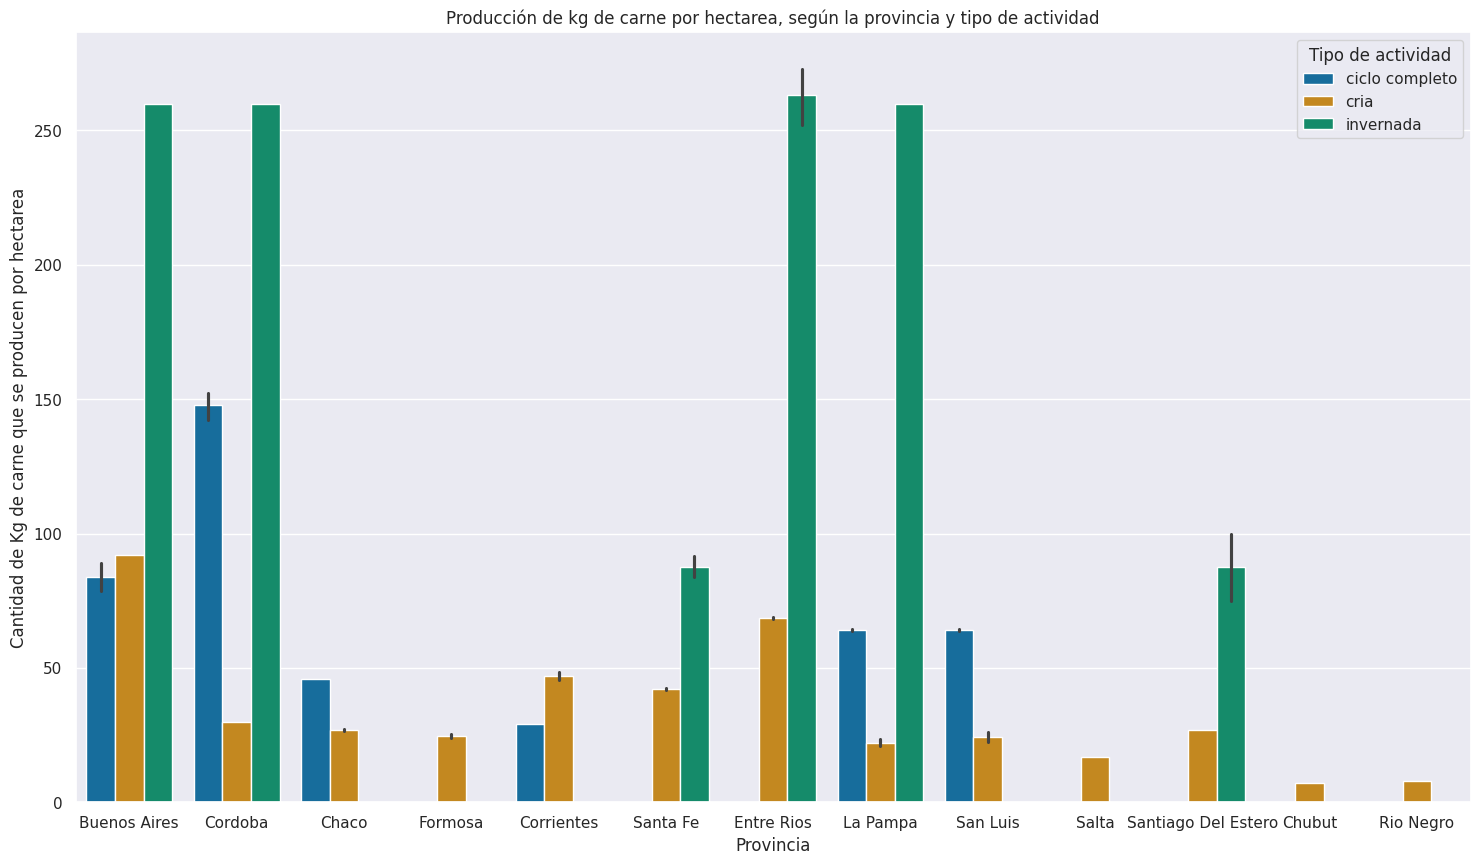

In [16]:
##Gráfico de barras para comparar la producción de kg de carne.
plt.figure (figsize=(18,10))
sns.set_theme(style="darkgrid")
sns.barplot (data=df_carne, x="Provincia", y="Producción (kg/ha)", hue="actividad", palette="colorblind")
plt.xlabel("Provincia")
plt.ylabel("Cantidad de Kg de carne que se producen por hectarea")
plt.title("Producción de kg de carne por hectarea, según la provincia y tipo de actividad")
plt.legend(title= "Tipo de actividad")
plt.show()

In [17]:

max_prod = df_carne.groupby("Provincia")["Producción (kg/ha)"].max().round(2)
max_prod.sort_values(inplace=True)

print ("Producción máxima de kg de carne por hectarea, distribuídos por provincia")
print()
max_prod

Producción máxima de kg de carne por hectarea, distribuídos por provincia



Provincia
Chubut                   7
Rio Negro                8
Salta                   17
Formosa                 28
Chaco                   46
Corrientes              63
San Luis                65
Santa Fe               125
Santiago Del Estero    125
Buenos Aires           260
Cordoba                260
La Pampa               260
Entre Rios             284
Name: Producción (kg/ha), dtype: int64

In [18]:
mean_prod = df_carne.groupby("Provincia")["Producción (kg/ha)"].mean().round(2)
mean_prod.sort_values(inplace=True)

print ("Media de kg de carne por hectarea, distribuídos por provincia")
print ()
mean_prod

Media de kg de carne por hectarea, distribuídos por provincia



Provincia
Chubut                   7.00
Rio Negro                8.00
Salta                   17.00
Formosa                 24.62
Santiago Del Estero     29.75
Chaco                   32.32
San Luis                33.11
Corrientes              45.31
Santa Fe                83.38
Cordoba                 84.12
Buenos Aires           104.39
La Pampa               121.45
Entre Rios             205.94
Name: Producción (kg/ha), dtype: float64

In [19]:
mean_prod_act = df_carne.groupby("actividad")["Producción (kg/ha)"].mean().round(2)
mean_prod_act.sort_values(inplace=True)

print ("Media de kg de carne producidos por hectarea, según tipo de actividad")
print ()
mean_prod_act

Media de kg de carne producidos por hectarea, según tipo de actividad



actividad
cria               45.13
ciclo completo     90.80
invernada         208.36
Name: Producción (kg/ha), dtype: float64

In [20]:
max_prod_act = df_carne.groupby("actividad")["Producción (kg/ha)"].max().round(2)
max_prod_act.sort_values(inplace=True)

print ("Valor máximo de kg de carne producidos por hectarea, según tipo de actividad")
print ()
max_prod_act

Valor máximo de kg de carne producidos por hectarea, según tipo de actividad



actividad
cria               92
ciclo completo    157
invernada         284
Name: Producción (kg/ha), dtype: int64

In [21]:
sum_prod = df_carne.groupby("Provincia")["Producción (kg/ha)"].sum().round(2)
sum_prod.sort_values (inplace=True)

print ("Producción total de kg de carne por hectarea, según provincia")
print()
sum_prod

Producción total de kg de carne por hectarea, según provincia



Provincia
Rio Negro                 64
Chubut                    84
Formosa                 2364
Salta                   2448
San Luis                3576
Santiago Del Estero     7854
Corrientes              8608
Chaco                   9696
Santa Fe               11006
Cordoba                26244
La Pampa               29148
Entre Rios             42012
Buenos Aires           61380
Name: Producción (kg/ha), dtype: int64

In [22]:
sum_prod_act = df_carne.groupby("actividad")["Producción (kg/ha)"].sum().round(2)
sum_prod.sort_values (inplace=True)

print ("Producción total de kg de carne por hectarea, según actividad")
print()
sum_prod_act

Producción total de kg de carne por hectarea, según actividad



actividad
ciclo completo    33234
cria              81238
invernada         90012
Name: Producción (kg/ha), dtype: int64

In [23]:
media_prod_act = df_carne.groupby("actividad")["Producción (kg/ha)"].mean().round(2)
median_prod_act =df_carne.groupby("actividad")["Producción (kg/ha)"].median().round(2)
print ("Media de producción de Kg de carne por actividad:",media_prod_act)
print()
print ("Mediana de producción de Kg de carne por actividad:",median_prod_act)


Media de producción de Kg de carne por actividad: actividad
ciclo completo     90.80
cria               45.13
invernada         208.36
Name: Producción (kg/ha), dtype: float64

Mediana de producción de Kg de carne por actividad: actividad
ciclo completo     65.0
cria               30.0
invernada         260.0
Name: Producción (kg/ha), dtype: float64


**Observando el gráfico de barras, así como los codigos ejecutados para
verificar el valor maximo y la media de tales variables, podemos considerar que la mayor producción de Kg de carne se da en la provincia de Entre Ríos. Tanto su producción maxima como su media se encuentra holgadamente por encima de las demás provincias.**

**La siguen La Pampa, Buenos Aires y Cordoba.**

**La mayor producción de carne bovina se da en la actividad de tipo de "Invernada", seguida luego por la actividad de "cría" y finalmente la actividad de "ciclo completo". De todas maneras esta relación no es univoca en todas las provincias, ya que en provincias como Buenos Aires o Corrientes existe una mayor cantidad de producción de Kg por medio de la actividad "Cria" que en las producciones del tipo "ciclo completo".**

**Además, cabe decir que si bien Entre ríos cuenta con una mayor producción de kg de Carne en promedio, en Buenos Aires hay una mayor diversidad en las actividades de producción, tendiendo a producir en total mayor cantidad de kg de Carne en comparación con Entre Ríos.**





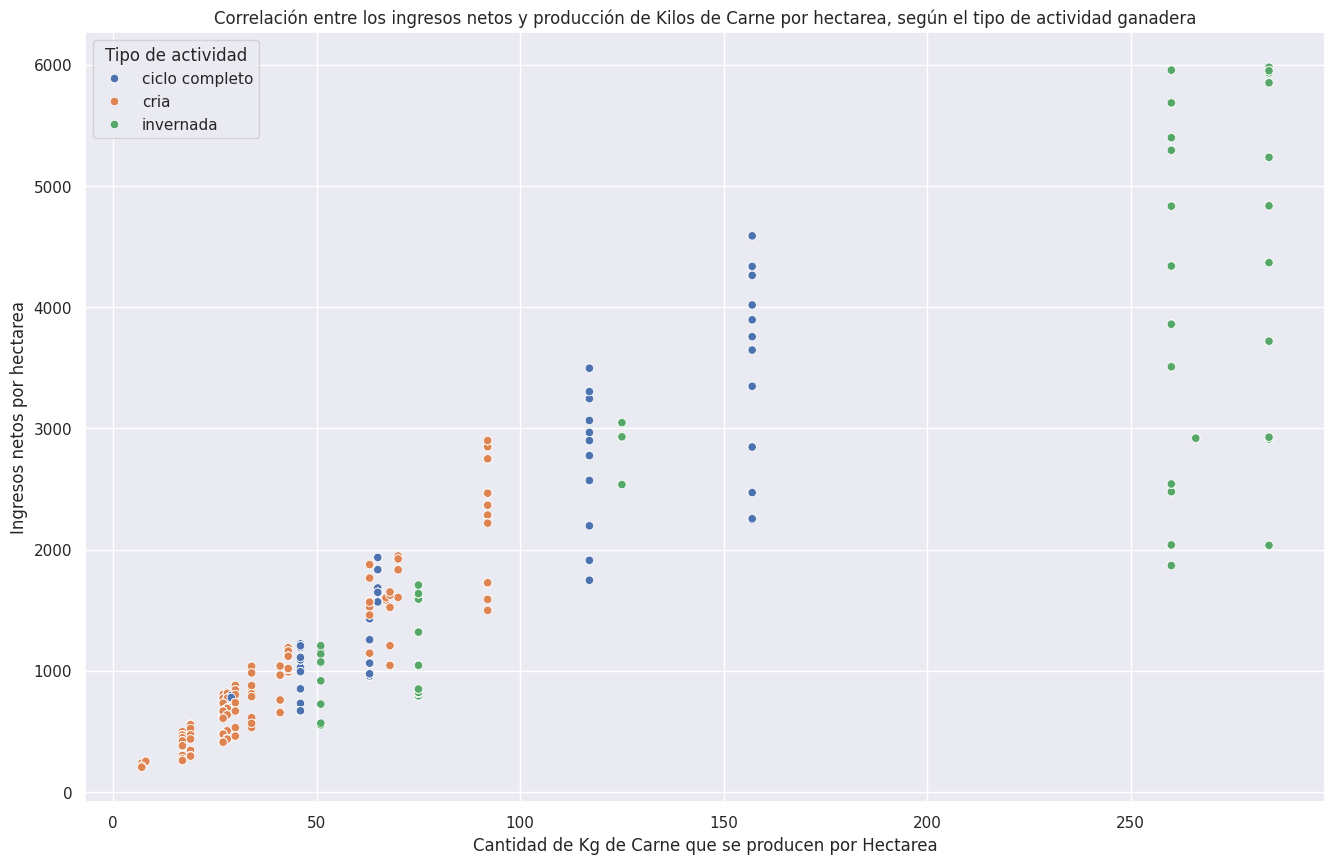

In [24]:
plt.figure (figsize=(16,10))
sns.set_theme(style="darkgrid")
sns.scatterplot (data=df_carne, x="Producción (kg/ha)", y="Ingreso neto ($/ha)", hue="actividad")
plt.xlabel("Cantidad de Kg de Carne que se producen por Hectarea")
plt.ylabel("Ingresos netos por hectarea")
plt.title("Correlación entre los ingresos netos y producción de Kilos de Carne por hectarea, según el tipo de actividad ganadera")
plt.legend(title= "Tipo de actividad")
plt.show()

In [25]:
mean_ing = df_carne.groupby("actividad")["Ingreso neto ($/ha)"].mean().round(2)
mean_ing.sort_values(inplace=True)

print("Media de ingresos netos por hectarea según tipo de actividad ganadera")
print()
mean_ing

Media de ingresos netos por hectarea según tipo de actividad ganadera



actividad
cria              1084.96
ciclo completo    2034.77
invernada         3290.78
Name: Ingreso neto ($/ha), dtype: float64

In [26]:
median_ing = df_carne.groupby("actividad")["Ingreso neto ($/ha)"].median().round(2)
print("Mediana de ingresos netos por hectarea según tipo de actividad ganadera")
print()
median_ing

Mediana de ingresos netos por hectarea según tipo de actividad ganadera



actividad
ciclo completo    1684.0
cria               733.0
invernada         2928.0
Name: Ingreso neto ($/ha), dtype: float64

**Como lógicamente se podía presuponer, siguiendo lo indicado por este gráfico de dispersión y por la media de ingresos luego verificada, existe una tendencia a tener mayores ingresos para la producción "Invernada", probablemente por la cantidad de kg de carne que producen.**

**De todas maneras, esa relación no es absoluta, ya que existen algunas producciones que utilizan un tipo de producción de "Ciclo completo" y poseen un mayor ingreso neto a pesar de tener menor producción de kg de carne por hectarea en comparación.**

**Igualmente, se puede verificar que la actividad de "Cria" tiende a tener menores ingresos, probablemente por esta tendencia de producir menor cantidad de kg de carne.**

<ipython-input-27-65a6eb09f96c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot (data=df_carne, x="actividad", y="Ingreso neto ($/ha)", palette = "tab10")


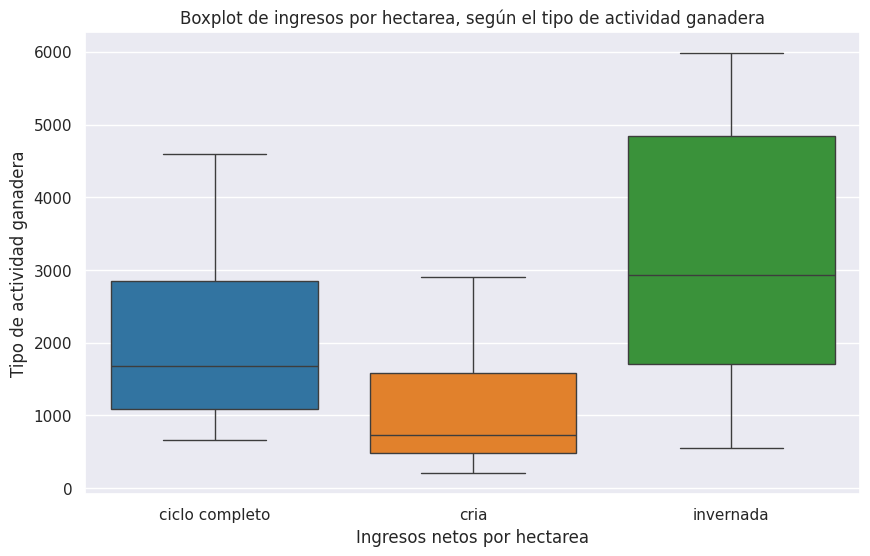

In [27]:
plt.figure (figsize=(10,6))
sns.set_theme(style="darkgrid")
sns.boxplot (data=df_carne, x="actividad", y="Ingreso neto ($/ha)", palette = "tab10")
plt.xlabel("Ingresos netos por hectarea")
plt.ylabel("Tipo de actividad ganadera")
plt.title("Boxplot de ingresos por hectarea, según el tipo de actividad ganadera")
plt.show()


**Para complementar el gráfico de dispersión anterior y poder comprender mejor la distribución de ingresos netos por hectarea, se hicieron estos tres boxplots según el tipo de actividad.**

**Como se observa, el ingreso neto más bajo lo detenta la actividad "Cria" y el ingreso neto máximo lo detenta la actividad "Invernada".**

**Asimismo, la mediana de los ingresos por hectarea de la actividad "cria" es menor a los 1000 pesos por hectarea, la mediana de ingresos de la actividad "Ciclo completo" es menor a 2000 pesos por hectarea, mientras que la mediana de ingresos de la actividad "Invernada" se ubica casi en los 3000 pesos por hectarea**

<ipython-input-28-77724d557833>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot (data=df_carne2, x="actividad", y= "Gastos",ax=axs[0], palette= "tab10")


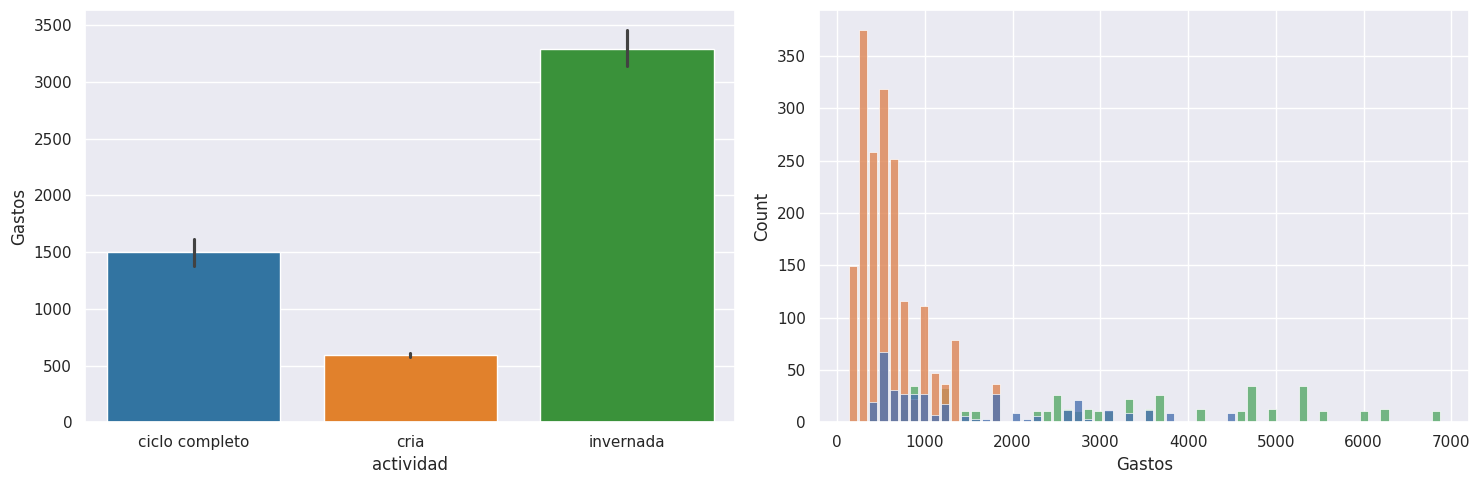

In [28]:
f,axs= plt.subplots (1,2,figsize=(15,5), gridspec_kw=dict(width_ratios=[10,10]))
sns.set_theme(style="darkgrid")
sns.barplot (data=df_carne2, x="actividad", y= "Gastos",ax=axs[0], palette= "tab10")
sns.histplot (data=df_carne2,x="Gastos", hue= "actividad", shrink=.8,alpha=.8, legend = False, ax=axs[1])
f.tight_layout()
plt.show()

In [29]:
media_gastos_act = df_carne2.groupby("actividad")["Gastos"].mean().round(2)

print("Media de gastos según tipo de actividad ganadera")
print()
print (media_gastos_act)

Media de gastos según tipo de actividad ganadera

actividad
ciclo completo    1498.08
cria               596.05
invernada         3288.16
Name: Gastos, dtype: float64


In [30]:
median_gastos_act = df_carne2.groupby("actividad")["Gastos"].median().round(2)

print("Mediana de gastos según tipo de actividad ganadera")
print()
print (median_gastos_act)

Mediana de gastos según tipo de actividad ganadera

actividad
ciclo completo    1011.0
cria               513.0
invernada         3039.0
Name: Gastos, dtype: float64


In [31]:
max_gastos_act = df_carne2.groupby("actividad")["Gastos"].max().round(2)

print("Valor máximo de gastos según tipo de actividad ganadera")
print()
print (max_gastos_act)

Valor máximo de gastos según tipo de actividad ganadera

actividad
ciclo completo    4453
cria              1754
invernada         6878
Name: Gastos, dtype: int64


In [32]:
sum_gastos_act = df_carne2.groupby("actividad")["Gastos"].sum().round(2)

print("Suma de gastos según tipo de actividad ganadera")
print()
print (sum_gastos_act)

Suma de gastos según tipo de actividad ganadera

actividad
ciclo completo     548297
cria              1072894
invernada         1420485
Name: Gastos, dtype: int64


In [33]:
count_act = df_carne2.groupby("actividad")["Provincia"].count()

print("Cantidad de establecimientos por tipo de actividad ganadera")
print()
print (count_act)

Cantidad de establecimientos por tipo de actividad ganadera

actividad
ciclo completo     366
cria              1800
invernada          432
Name: Provincia, dtype: int64


**Siguiendo los dos gráficos plasmados, así como los calculos de media, mediana y moda en relación a los gastos totales de los diferentes tipos de producción, resulta mucho más barata la actividad de "Cría" que la de "Invernada" y "Ciclo completo", lo que explicaría la mayor cantidad de establecimientos con los que cuenta este tipo de actividad**

In [34]:
Actividades= df_carne2["actividad"].unique()

In [35]:
suma_ing_act = df_carne2.groupby("actividad")["Ingreso neto ($/ha)"].sum().round(2)

Text(0.5, 1.0, 'Proporción de ingresos netos según tipo de actividad')

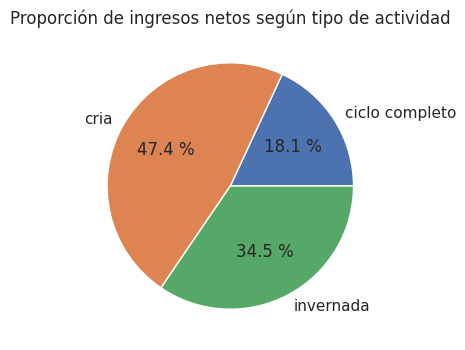

In [36]:
fig, ax = plt.subplots(figsize=(8,4))
ax.pie(suma_ing_act, labels=Actividades,  autopct="%0.1f %%")
plt.title ("Proporción de ingresos netos según tipo de actividad")

Text(0.5, 1.0, 'Proporción de gastos según tipo de actividad')

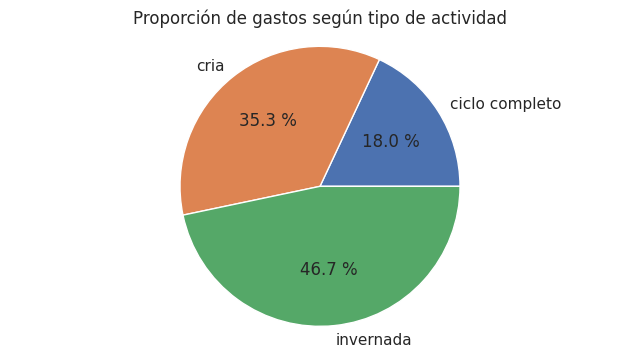

In [37]:
fig, ax = plt.subplots(figsize=(8,4))
ax.pie(sum_gastos_act, labels=Actividades, autopct="%0.1f %%")
plt.axis("equal")
plt.title ("Proporción de gastos según tipo de actividad")

In [38]:
print ("Suma de ingresos netos por actividad")
print()
suma_ing_act

Suma de ingresos netos por actividad



actividad
ciclo completo     744726
cria              1952935
invernada         1421619
Name: Ingreso neto ($/ha), dtype: int64

In [39]:
mean_res_act = df_carne2.groupby("actividad")["Resultado neto ($/ha)"].mean().round(2)

Text(0.5, 1.0, 'Proporción de media de ganancias netas según tipo de actividad')

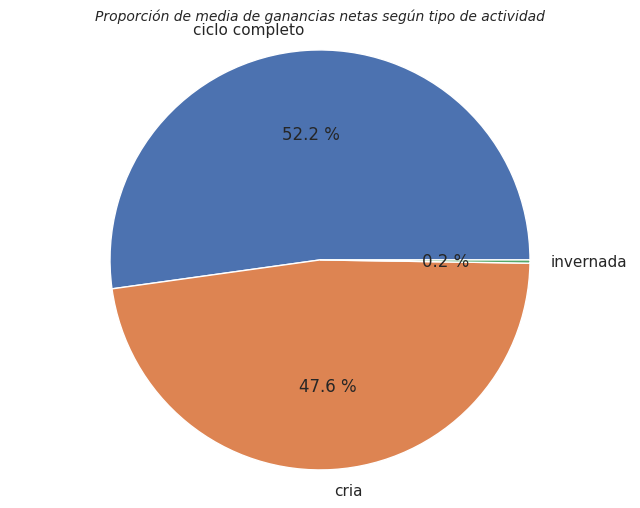

In [40]:
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(mean_res_act, labels=Actividades,autopct="%0.1f %%")
plt.axis("equal")
plt.title ("Proporción de media de ganancias netas según tipo de actividad", fontsize = 10, style = "italic", loc="center")

In [41]:
print ("Media de ganancias netas por hectarea, según tipo de actividad")
print()
mean_res_act

Media de ganancias netas por hectarea, según tipo de actividad



actividad
ciclo completo    536.69
cria              488.94
invernada           2.53
Name: Resultado neto ($/ha), dtype: float64

<ipython-input-134-6dd0763ccc6a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot (data=df_carne, x="actividad", y="Resultado neto ($/ha)", palette = "tab10")


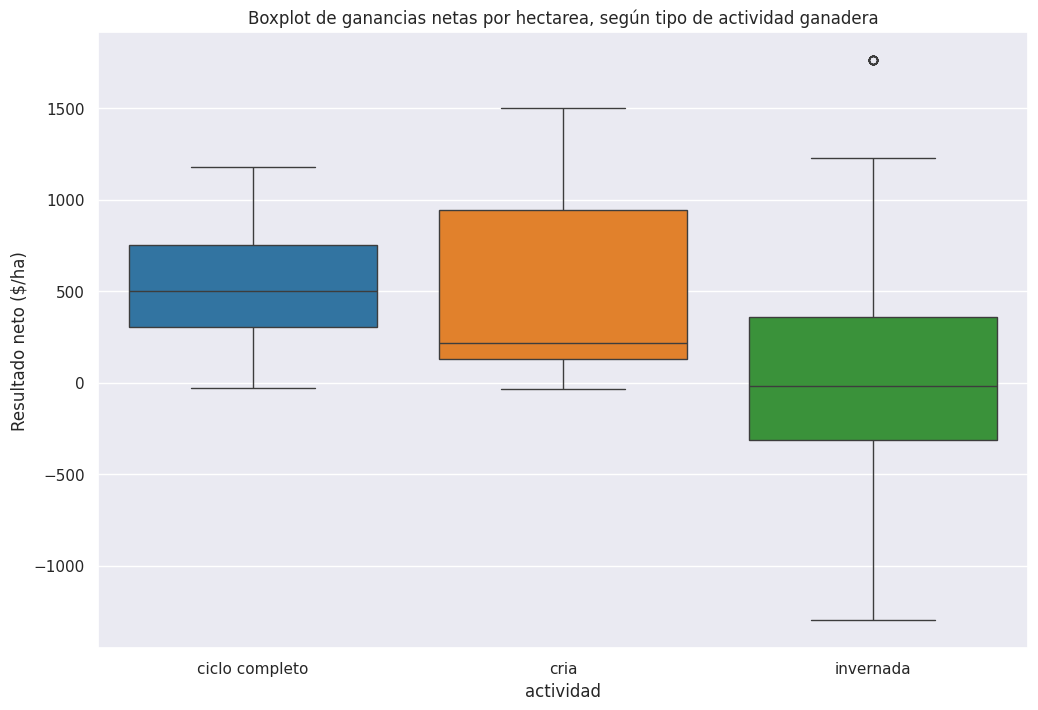

In [134]:
plt.figure (figsize=(12,8))
sns.set_theme(style="darkgrid")
sns.boxplot (data=df_carne, x="actividad", y="Resultado neto ($/ha)", palette = "tab10")
plt.title ("Boxplot de ganancias netas por hectarea, según tipo de actividad ganadera")
plt.show()

In [43]:
median_res_act = df_carne2.groupby("actividad")["Resultado neto ($/ha)"].median().round(2)
print ("Mediana de ganancias netas por hectarea, según tipo de actividad")
print()
median_res_act

Mediana de ganancias netas por hectarea, según tipo de actividad



actividad
ciclo completo    501.0
cria              218.0
invernada         -20.0
Name: Resultado neto ($/ha), dtype: float64

In [44]:
cuartil3_res_act = df_carne2.groupby("actividad")["Resultado neto ($/ha)"].quantile(0.75).round(2)
print ("Tercer cuartil de ganancias netas por hectarea, según tipo de actividad")
print()
cuartil3_res_act

Tercer cuartil de ganancias netas por hectarea, según tipo de actividad



actividad
ciclo completo    750.0
cria              943.0
invernada         359.0
Name: Resultado neto ($/ha), dtype: float64

In [45]:
max_res_act = df_carne2.groupby("actividad")["Resultado neto ($/ha)"].max().round(2)
print ("Ganancias máximas netas por hectarea, según tipo de actividad")
print()
max_res_act

Ganancias máximas netas por hectarea, según tipo de actividad



actividad
ciclo completo    1180
cria              1502
invernada         1761
Name: Resultado neto ($/ha), dtype: int64

**Considerando ahora la proporción de gastos y de ganancias netas por hectarea, se puede considerar que si bien la actividad "Invernada" tiene una mayor cantidad de ingresos netos por hectarea, es una actividad con altos costos que no necesariamente trae aparejados buenos resultados en las ganancias definitivas. Tanto la media como la mediana de ganancias de esta actividad da valores muy bajos, por lo que es algo incierta una inversión en ese tipo de actividad ganadera**

**La actividad con mayor ganancia neta media por hectarea es la de "ciclo completo". Eso se puede apreciar mejor cuando consideramos la mediana de ganancias, que se encuentra en 501 pesos frente a los 218 pesos que cuenta como mediana la actividad de "cría".**

**De todas maneras, cabe decir que a partir algunos percentiles antes del tercer cuartil de ganancias medias, existe un mayor ganancia neta para la actividad de tipo "cria", derivando en que el mayor pico de ganancias se encuentre dicha actividad**.

**Ahora se ejecutara un modelo de regresión lineal para predecir los ingresos en función de la producción de Kg de carne por hectarea. En base al mismo, se intentara hacer una recomendación del tipo de actividad en la que se debería invertir, teniendo en cuenta las ventajas y desventajas hasta aquí consideradas para cada tipo de actividad**

**Se toma la decisión de considerar los ingresos netos en lugar de las ganancias netas dado que esta variable probablemente sea más fácil de predecir en correlación con la producción de kg de carne. En cambio, las ganancias netas se necesitaría tener en cuenta también los posibles gastos que se puedan afrontar, debiendo considerarse entonces una mayor cantidad de variables, siendo posiblemente poco apropiado intentar predecir tal variable en una relación lineal**

# Modelo de predicción de ingresos netos según cantidad de kg de carne producidos




In [46]:
#estructuración de df para generar las variables del modelo predictivo
df_carne3 = df_carne2
df_carne3 = df_carne3.drop ("Año",axis=1)
df_carne3 = df_carne3.drop("modelo", axis=1)
df_carne3 = df_carne3.drop("Margen bruto ($/ha)", axis=1)
df_carne3 = df_carne3.drop ("Resultado neto ($/ha)",axis=1)
df_carne3 = df_carne3.drop("Gastos directos ($/ha)", axis=1)
df_carne3 = df_carne3.drop("Eficiencia stock(%)", axis=1)
df_carne3 = df_carne3.drop("Carga (kg/ha)", axis=1)
df_carne3 = df_carne3.drop("País", axis=1)
df_carne3 = df_carne3.drop("Provincia", axis=1)
df_carne3 = df_carne3.drop ("Departamento",axis=1)
df_carne3 = df_carne3.drop("Costos indirectos ($/ha)", axis=1)
df_carne3 = df_carne3.drop("Gastos", axis=1)


In [47]:
df_carne3.head()

,actividad,Ingreso neto ($/ha),Producción (kg/ha)
0,ciclo completo,3497,117
1,ciclo completo,3497,117
2,ciclo completo,3497,117
3,ciclo completo,4589,157
4,ciclo completo,4589,157


In [48]:
#ajuste de las variables para el modelo predictivo
Ingresos = df_carne3["Ingreso neto ($/ha)"]
Ingresos = np.array(Ingresos).reshape(-1,1)

Producción = df_carne3["Producción (kg/ha)"]
Producción = np.array(Producción).reshape(-1,1)

In [49]:
#Ajuste de la variable con datos sin estandarizar
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test = train_test_split(Producción, Ingresos,test_size=0.3,random_state=22)

lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred1 = lr.predict(X_test)
y_pred2 = lr.predict(X_train)

In [50]:
#estandarización de los datos
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

Ingresos = Scaler.fit_transform(Ingresos)
Producción = Scaler.fit_transform(Producción)

In [51]:
#Ajuste de las variables con los datos estandarizados
X_train1,X_test1,y_train1,y_test1 = train_test_split(Producción, Ingresos,test_size=0.3,random_state=22)

lr.fit(X_train1,y_train1)

y_pred3 = lr.predict(X_test1)
y_pred4 = lr.predict(X_train1)

In [52]:
slope = lr.coef_
interceptor= lr.intercept_

print("Pendiente de regresión:", slope)
print ()
print ("Interceptor de la regresión:", interceptor)

Pendiente de regresión: [[0.86787631]]

Interceptor de la regresión: [0.00110785]


Text(0, 0.5, 'Ingresos netos por hectarea')

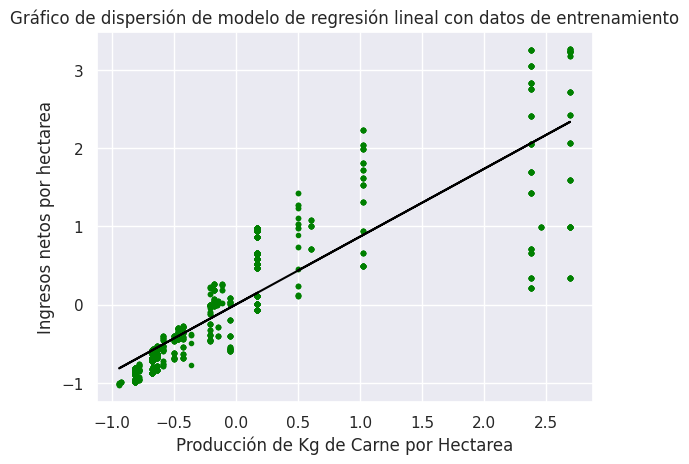

In [53]:
viz_train = plt
viz_train.scatter(X_train1, y_train1, marker=".", color= "green")
viz_train.plot(X_train1, lr.predict(X_train1), color= "black")
plt.title("Gráfico de dispersión de modelo de regresión lineal con datos de entrenamiento")
plt.xlabel ("Producción de Kg de Carne por Hectarea")
plt.ylabel ("Ingresos netos por hectarea")

Text(0, 0.5, 'Ingresos netos por hectarea')

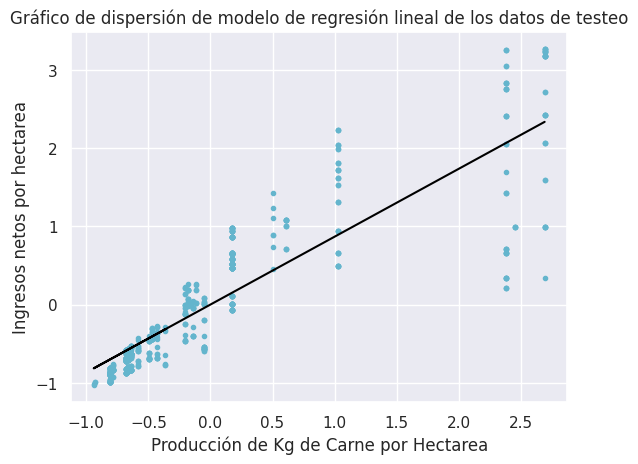

In [54]:
viz_train = plt
viz_train.scatter(X_test1, y_test1, marker=".", color= "c")
viz_train.plot(X_test1, lr.predict(X_test1), color= "black")
plt.title("Gráfico de dispersión de modelo de regresión lineal de los datos de testeo")
plt.xlabel ("Producción de Kg de Carne por Hectarea")
plt.ylabel ("Ingresos netos por hectarea")

In [55]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print ("Metricas del modelo con datos de entrenamiento sin estandarizar")
print ()
print("MAE:",mean_absolute_error(y_train,y_pred2).round(2))
print("RMSE", np.sqrt((mean_squared_error(y_train,y_pred2))).round(2))
r2_test2 = r2_score(y_train,y_pred2).round(2)
print ("R2:",r2_test2)
print()
print ("Metricas del modelo con datos de entrenamiento")
print ()
print ("MAE:",mean_absolute_error(y_train1,y_pred4).round(2))
print("MSE", mean_squared_error(y_train1,y_pred4).round(2))
r2_train = r2_score(y_train1,y_pred4).round(2)
print("R2:",r2_train)

Metricas del modelo con datos de entrenamiento sin estandarizar

MAE: 438.66
RMSE 648.94
R2: 0.77

Metricas del modelo con datos de entrenamiento

MAE: 0.33
MSE 0.23
R2: 0.77


In [56]:
print ("Metricas del modelo con datos de testeo sin estandarizar")
print ()
print("MAE:",mean_absolute_error(y_test,y_pred1).round(2))
print("RMSE", np.sqrt((mean_squared_error(y_test,y_pred1))).round(2))
r2_test2 = r2_score(y_test,y_pred1).round(2)
print ("R2:",r2_test2)
print()
print ("Metricas del modelo con datos de testeo estandarizados")
print ()
print("MAE:",mean_absolute_error(y_test1,y_pred3).round(2))
print("RMSE", np.sqrt(mean_squared_error(y_test1,y_pred3)).round(2))
r2_test = r2_score(y_test1,y_pred3).round(2)
print ("R2:",r2_test)

Metricas del modelo con datos de testeo sin estandarizar

MAE: 410.62
RMSE 611.45
R2: 0.79

Metricas del modelo con datos de testeo estandarizados

MAE: 0.31
RMSE 0.45
R2: 0.79


In [57]:
print("Media de ingresos netos según modelo de regresión lineal")
print()
print("Media según datos de entrenamiento:", "$", y_pred2.mean().round(2))
print ("Media según datos de testeo:", "$", y_pred1.mean().round(2))
print()
mean = df_carne2["Ingreso neto ($/ha)"].mean().round(2)
print("Media de ingresos en el dataset")
print(mean)


Media de ingresos netos según modelo de regresión lineal

Media según datos de entrenamiento: $ 1604.05
Media según datos de testeo: $ 1547.41

Media de ingresos en el dataset
1585.56


**Considerando las metricas que vemos en este modelo de regresión, se podría decir que hay una importante correlación entre la producción de Kg de carne y una posible predicción de los ingresos netos que se podrían tener en consecuencia.**
**En primer lugar, podemos observar que las metricas no difieren mucho entre los datos de entrenamiento y los datos de testeo. Incluso se puede observar que tienden a ser un poco más bajos los errores con los datos de testeo.**

**Observando el MAE (error absoluto medio), se observa un error de 0.33 en los datos de entrenamiento y 0.31 en los datos de testeo, lo cual es un error relativamente medio para lo que se considera entre valores predichos y valores objetivos. Si consideramos los valores sin estandarizar, el promedio de diferencia entre el valor predicho y el valor real es de 410 pesos, lo cual es un valor relativamente importante para ser la diferencia absoluta entre valores predichos y observados.**

**Algo similar sucede con los casos de error cuadrático medio (RMSE). Al ser la desviación estandar de la varianza inexplicada, que el error estandarizado sea de 0.45 (611 pesos en los datos no estandarizados) implica que hay una variacion importante entre el valor real y el pronosticado. Es decir, hay un desajuste relativamente importante entre valores predichos y valores observados.**

**Al ser valores que no son cercanos a 0, se puede deducir que hay un importante diferencia. Quizás esta tenga que ver con la falta de homocedasticidad, puesto que en la medida que aumenta la producción de kg de carne, se puede ver que pierde cierta relación positiva entre crecimiento de la producción e ingresos netos. En el desarrollo del gráfico habia cierta relación positiva entre estas dos variables, hasta que los datos estandarizados están en el centro del gráfico de dispersión (1.0 en variable x, 1 en variable y)**

**Desde ese punto del gráfico, hay una importancia varianza en los residuales y no se puede observar una relación necesariamente lineal entre las variables.**

**De todas maneras, el R Cuadrado (R2) indica que para explicar la varianza de los ingresos netos, la variable de producción de kg de carne por hectarea es necesaria, ya que explica un 77% de su variabilidad en los datos de entrenamiento, y 79% en los datos de testeo. Esto significa que, si bien con la regresión lineal probablemente sea díficil predecir la variable por la distancia entre valores predichos y reales, en cualquier otro modelo se necesitaría tener en cuenta la relación entre estas dos variables.**  



# Modelo de regresión para cada tipo de actividad

In [90]:
#Filtrado para dividir los modelos
df_filtrado = df_carne2.loc[df_carne2['actividad'] == "cria"]
df_filtrado2 = df_carne2.loc[df_carne2['actividad'] == "ciclo completo"]
df_filtrado3 = df_carne2.loc[df_carne2['actividad'] == "invernada"]

In [91]:
#Variables para generar los modelos
Ingresos_cria = df_filtrado["Ingreso neto ($/ha)"]
Ingresos_cria = np.array(Ingresos_cria).reshape(-1,1)
Ingresos_cria2 = np.array(Ingresos_cria).reshape(-1,1)

Ingresos_ciclocomp = df_filtrado2["Ingreso neto ($/ha)"]
Ingresos_ciclocomp = np.array(Ingresos_ciclocomp).reshape(-1,1)
Ingresos_ciclocomp2 = np.array(Ingresos_ciclocomp).reshape(-1,1)

Ingresos_inv = df_filtrado3["Ingreso neto ($/ha)"]
Ingresos_inv = np.array(Ingresos_inv).reshape(-1,1)
Ingresos_inv2 = np.array(Ingresos_inv).reshape(-1,1)

Producción_cria = df_filtrado["Producción (kg/ha)"]
Producción_cria = np.array(Producción_cria).reshape(-1,1)
Producción_cria2 = np.array(Producción_cria).reshape(-1,1)

Producción_ciclocomp = df_filtrado2["Producción (kg/ha)"]
Producción_ciclocomp = np.array(Producción_ciclocomp).reshape(-1,1)
Producción_ciclocomp2 = np.array(Producción_ciclocomp).reshape(-1,1)

Producción_inv = df_filtrado3["Producción (kg/ha)"]
Producción_inv = np.array(Producción_inv).reshape(-1,1)
Producción_inv2 = np.array(Producción_inv).reshape(-1,1)

**--Modelo de regresión lineal de la Cria de ganado--**



In [92]:
#Modelo de regresión lineal sin estandarizar, con medidas de entrenamiento
X_cria_train,X_cria_test,y_cria_train,y_cria_test = train_test_split(Producción_cria, Ingresos_cria,test_size=0.3,random_state=45)

lr.fit(X_cria_train,y_cria_train)

y_pred_cria1 = lr.predict(X_cria_test)

Text(0, 0.5, 'Ingresos netos por hectarea')

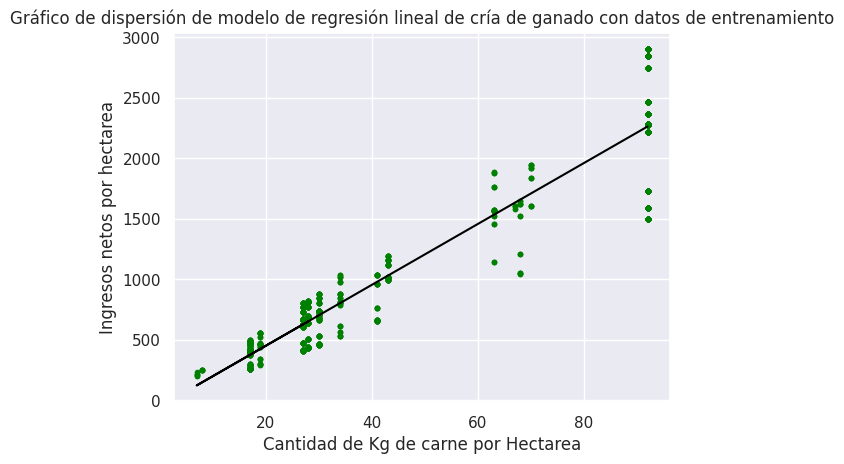

In [93]:
viz_train = plt
viz_train.scatter(X_cria_train, y_cria_train, marker=".", color= "green")
viz_train.plot(X_cria_train, lr.predict(X_cria_train), color= "black")
plt.title("Gráfico de dispersión de modelo de regresión lineal de cría de ganado con datos de entrenamiento")
plt.xlabel ("Cantidad de Kg de carne por Hectarea")
plt.ylabel ("Ingresos netos por hectarea")

In [94]:
#Modelo de regresión lineal sin estandarizar, con medidas de testeo
lr.fit(X_cria_test,y_cria_test)
y_pred_cria_2 = lr.predict(X_cria_train)

Text(0, 0.5, 'Ingresos netos por hectarea')

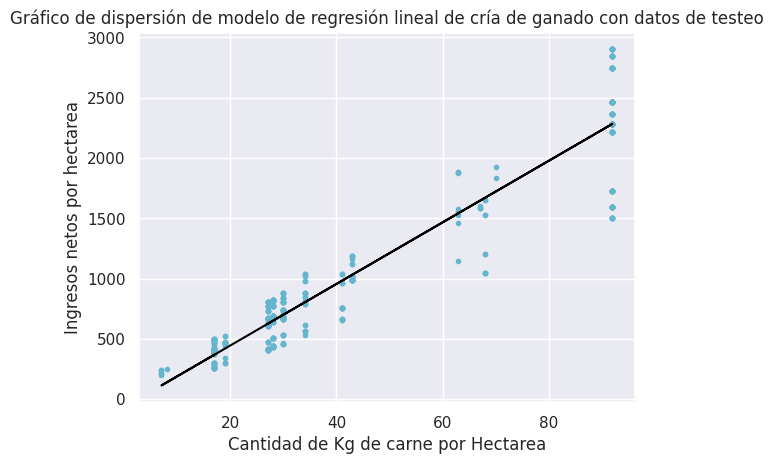

In [95]:
viz_train = plt
viz_train.scatter(X_cria_test, y_cria_test, marker=".", color= "c")
viz_train.plot(X_cria_test, lr.predict(X_cria_test), color= "black")
plt.title("Gráfico de dispersión de modelo de regresión lineal de cría de ganado con datos de testeo")
plt.xlabel ("Cantidad de Kg de carne por Hectarea")
plt.ylabel ("Ingresos netos por hectarea")

In [96]:
#Modelo de regresión lineal estandarizado, con medidas de entrenamiento
Ingresos_cria2= Scaler.fit_transform(Ingresos_cria2)
Producción_cria2 = Scaler.fit_transform(Producción_cria2)

X_cria_train2,X_cria_test2,y_cria_train2,y_cria_test2 = train_test_split(Producción_cria2, Ingresos_cria2,test_size=0.3,random_state=45)

lr.fit(X_cria_train2,y_cria_train2)

y_pred_cria3 = lr.predict(X_cria_test2)



Text(0, 0.5, 'Ingresos netos por hectarea')

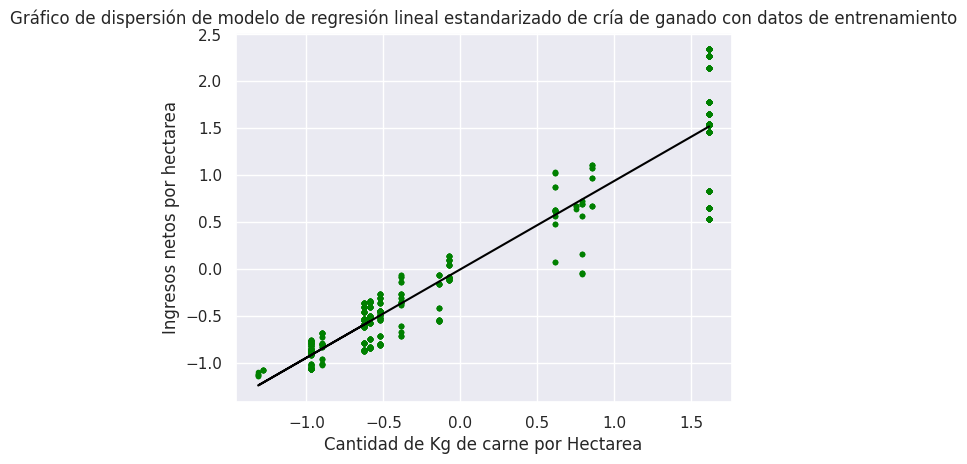

In [97]:
viz_train = plt
viz_train.scatter(X_cria_train2, y_cria_train2, marker=".", color= "green")
viz_train.plot(X_cria_train2, lr.predict(X_cria_train2), color= "black")
plt.title("Gráfico de dispersión de modelo de regresión lineal estandarizado de cría de ganado con datos de entrenamiento")
plt.xlabel ("Cantidad de Kg de carne por Hectarea")
plt.ylabel ("Ingresos netos por hectarea")

In [98]:
#Modelo de regresión lineal estandarizado, con medidas de testeo
lr.fit(X_cria_test2,y_cria_test2)

y_pred_cria4 = lr.predict(X_cria_train2)

Text(0, 0.5, 'Ingresos netos por hectarea')

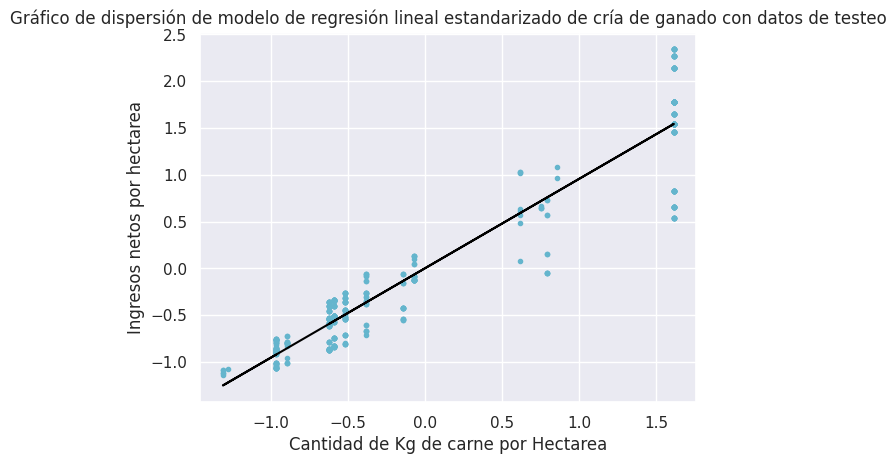

In [99]:
#Gráfico de regresión lineal estandarizado, con medidas de testeo

viz_train = plt
viz_train.scatter(X_cria_test2, y_cria_test2, marker=".", color= "c")
viz_train.plot(X_cria_test2, lr.predict(X_cria_test2), color= "black")
plt.title("Gráfico de dispersión de modelo de regresión lineal estandarizado de cría de ganado con datos de testeo")
plt.xlabel ("Cantidad de Kg de carne por Hectarea")
plt.ylabel ("Ingresos netos por hectarea")

In [100]:
print ("Metricas del modelo de regresión lineal en la actividad cria, datos de entrenamiento sin estandarizar")
print ()
print("MAE",mean_absolute_error(y_cria_train,y_pred_cria_2).round(2))
print("RMSE", np.sqrt(mean_squared_error(y_cria_train,y_pred_cria_2)).round(2))
r2_cria_entrenamiento1 = r2_score(y_cria_train,y_pred_cria_2).round(2)
print("R2_Cria",r2_cria_entrenamiento1)

print ("Metricas del modelo de regresión lineal en la actividad cria. Datos de entrenamiento")
print ()
print("MAE",mean_absolute_error(y_cria_train2,y_pred_cria4).round(2))
print("RMSE", np.sqrt(mean_squared_error(y_cria_train2,y_pred_cria4)).round(2))
r2_cria_entrenamiento2 = r2_score(y_cria_train2,y_pred_cria4).round(2)
print("R2_Cria",r2_cria_entrenamiento2)

Metricas del modelo de regresión lineal en la actividad cria, datos de entrenamiento sin estandarizar

MAE 165.46
RMSE 257.1
R2_Cria 0.89
Metricas del modelo de regresión lineal en la actividad cria. Datos de entrenamiento

MAE 0.21
RMSE 0.33
R2_Cria 0.89


In [101]:
print ("Metricas del modelo de regresión lineal en la actividad cria, datos de testeo sin estandarizar")
print ()
print("MAE",mean_absolute_error(y_cria_test,y_pred_cria1).round(2))
print("RMSE", np.sqrt(mean_squared_error(y_cria_test,y_pred_cria1)).round(2))
r2_cria_testeo1 = r2_score(y_cria_test,y_pred_cria1).round(2)
print("R2_Cria",r2_cria_testeo1)
print()
print ("Metricas del modelo de regresión lineal en la actividad cria. Datos de testeo estandarizados")
print ()
print("MAE",mean_absolute_error(y_cria_test2,y_pred_cria3).round(2))
print("RMSE", np.sqrt(mean_squared_error(y_cria_test2,y_pred_cria3)).round(2))
r2_cria_testeo2 = r2_score(y_cria_test2,y_pred_cria3).round(2)
print("R2_Cria",r2_cria_testeo2)

Metricas del modelo de regresión lineal en la actividad cria, datos de testeo sin estandarizar

MAE 161.2
RMSE 243.31
R2_Cria 0.9

Metricas del modelo de regresión lineal en la actividad cria. Datos de testeo estandarizados

MAE 0.21
RMSE 0.31
R2_Cria 0.9


**Observando las métricas del modelo de regresión lineal aplicado para los datos de la actividad de cría de ganado, se puede observar que existe un mejor ajuste para este modelo. Esto pareciera deberse a que pareciera existir una relación positiva más constante entre la producción de kg de carne de ese tipo de actividad con los ingresos netos que se obtienen.**

**A diferencia del modelo que considera a los tres tipos de actividades, en este modelo pareciera que en la medida que aumenta la cantidad de kg de carne por hectarea, aumenta mayormente los ingresos netos, habiendo una menor varianza del error.**

**Esto puede observarse también en las metricas. Con respecto al error medio absoluto (MAE) se puede observar un error de 0.21 (161 pesos en los datos no estandarizados), lo cual es un error de bajo alcance. El error cuadratico medio (RMSE) es algo más elevado, de 0.31 (243,31 pesos) aunque de todas maneras no demasiado. Por lo que se ve, no hay una variación descomunal entre los valores predichos y los observados.**

**Además, en este modelo de predicción, el R2 muestra una mayor correlación entre estas dos variables, siendo de alrededor del 90% de la varianza de los ingresos netos explicada por la producción de kg de carne.**

**Todo esto me lleva a afirmar que este modelo de regresión lineal ajustado a la actividad de cría de ganado es un modelo apto para predecir los ingresos netos, y brinda cierta certidumbre a la hora de planificar la obtención de ingresos netos futuros en función de las dos variables relacionadas**

**Modelo de regresión lineal para la actividad de ciclo completo**

In [102]:
#modelo de regresión lineal para la actividad de ciclo completo, con datos de entrenamiento, sin estandarizar
X_ciclo_train,X_ciclo_test,y_ciclo_train,y_ciclo_test = train_test_split(Producción_ciclocomp, Ingresos_ciclocomp,test_size=0.3,random_state=45)

lr.fit(X_ciclo_train,y_ciclo_train)

y_pred_ciclo1 = lr.predict(X_ciclo_test)

Text(0, 0.5, 'Ingresos netos por hectarea')

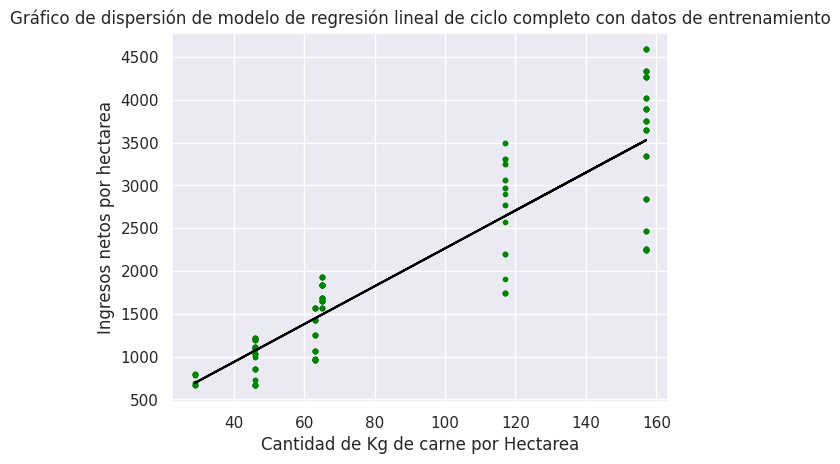

In [103]:
viz_train = plt
viz_train.scatter(X_ciclo_train, y_ciclo_train,marker=".", color= "green")
viz_train.plot(X_ciclo_train, lr.predict(X_ciclo_train), color= "black")
plt.title("Gráfico de dispersión de modelo de regresión lineal de ciclo completo con datos de entrenamiento")
plt.xlabel ("Cantidad de Kg de carne por Hectarea")
plt.ylabel ("Ingresos netos por hectarea")

In [104]:
#modelo de regresión lineal para la actividad de ciclo completo, con datos de testeo, sin estandarizar

lr.fit(X_ciclo_test,y_ciclo_test)
y_pred_ciclo2 = lr.predict(X_ciclo_train)

Text(0, 0.5, 'Ingresos netos por hectarea')

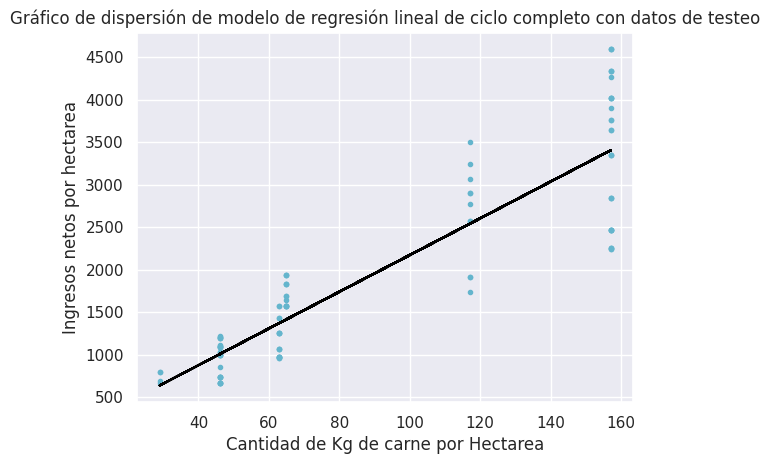

In [105]:
viz_train = plt
viz_train.scatter(X_ciclo_test, y_ciclo_test, marker=".", color= "c")
viz_train.plot(X_ciclo_test, lr.predict(X_ciclo_test), color= "black")
plt.title("Gráfico de dispersión de modelo de regresión lineal de ciclo completo con datos de testeo")
plt.xlabel ("Cantidad de Kg de carne por Hectarea")
plt.ylabel ("Ingresos netos por hectarea")

In [106]:
#modelo de regresión lineal estandarizado para la actividad de ciclo completo, con datos de entrenamiento

Producción_ciclocomp2= Scaler.fit_transform(Producción_ciclocomp2)
Ingresos_ciclocomp2 = Scaler.fit_transform(Ingresos_ciclocomp2)

X_ciclo_train2,X_ciclo_test2,y_ciclo_train2,y_ciclo_test2 = train_test_split(Producción_ciclocomp2, Ingresos_ciclocomp2,test_size=0.3,random_state=45)

lr.fit(X_ciclo_train2,y_ciclo_train2)

y_pred_ciclo3 = lr.predict(X_ciclo_test2)


Text(0, 0.5, 'Ingresos netos por hectarea')

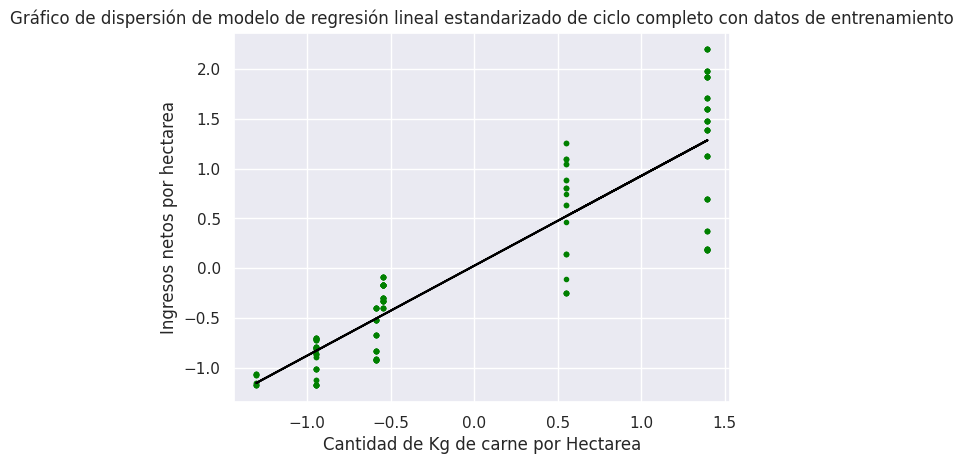

In [107]:
#gráfico de regresión lineal estandarizado para la actividad de ciclo completo, con datos de entrenamiento

viz_train = plt
viz_train.scatter(X_ciclo_train2, y_ciclo_train2, marker=".", color= "green")
viz_train.plot(X_ciclo_train2, lr.predict(X_ciclo_train2), color= "black")
plt.title("Gráfico de dispersión de modelo de regresión lineal estandarizado de ciclo completo con datos de entrenamiento")
plt.xlabel ("Cantidad de Kg de carne por Hectarea")
plt.ylabel ("Ingresos netos por hectarea")

In [108]:
#modelo de regresión lineal estandarizado para la actividad de ciclo completo, con datos de entrenamiento

lr.fit(X_ciclo_test2,y_ciclo_test2)

y_pred_ciclo4 = lr.predict(X_ciclo_train2)


Text(0, 0.5, 'Ingresos netos por hectarea')

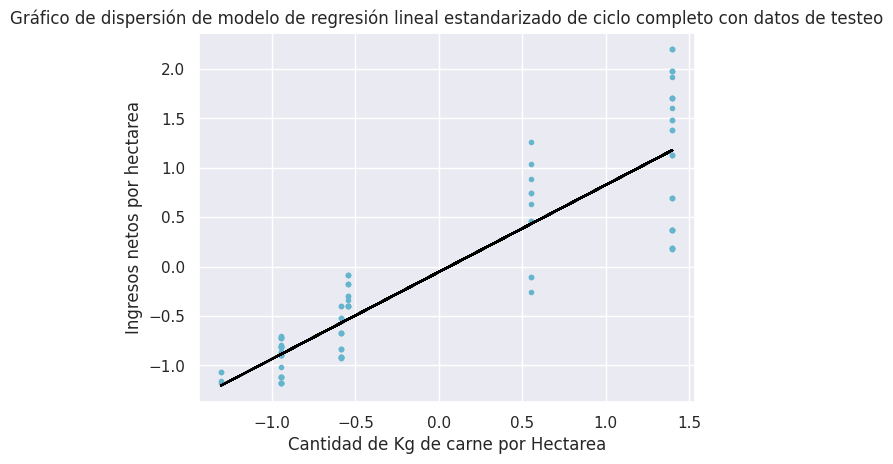

In [109]:
viz_train = plt
viz_train.scatter(X_ciclo_test2, y_ciclo_test2, marker=".", color= "c")
viz_train.plot(X_ciclo_test2, lr.predict(X_ciclo_test2), color= "black")
plt.title("Gráfico de dispersión de modelo de regresión lineal estandarizado de ciclo completo con datos de testeo")
plt.xlabel ("Cantidad de Kg de carne por Hectarea")
plt.ylabel ("Ingresos netos por hectarea")

In [110]:
print ("Metricas de ciclo completo, datos de entrenamiento sin estandarizar")
print ()
print("MAE",mean_absolute_error(y_ciclo_train,y_pred_ciclo2).round(2))
print("RMSE", np.sqrt(mean_squared_error(y_ciclo_train,y_pred_ciclo2)).round(2))
r2_ciclo_entrenamiento1 = r2_score(y_ciclo_train,y_pred_ciclo2).round(2)
print("R2_ciclo",r2_ciclo_entrenamiento1)
print()
print ("Metricas de ciclo completo, datos de entrenamiento estandarizados")
print ()
print("MAE",mean_absolute_error(y_ciclo_train2,y_pred_ciclo4).round(2))
print("RMSE", np.sqrt(mean_squared_error(y_ciclo_train2,y_pred_ciclo4)).round(2))
r2_ciclo_entrenamiento2 = r2_score(y_ciclo_train2,y_pred_ciclo4).round(2)
print("R2_ciclo",r2_ciclo_entrenamiento2)

Metricas de ciclo completo, datos de entrenamiento sin estandarizar

MAE 406.46
RMSE 518.4
R2_ciclo 0.8

Metricas de ciclo completo, datos de entrenamiento estandarizados

MAE 0.35
RMSE 0.45
R2_ciclo 0.8


In [111]:
print ("Metricas de ciclo completo, datos de testeo")
print ()
print("MAE",mean_absolute_error(y_ciclo_test,y_pred_ciclo1).round(2))
print("RMSE", np.sqrt(mean_squared_error(y_ciclo_test,y_pred_ciclo1)).round(2))
r2_ciclo_testeo1 = r2_score(y_ciclo_test,y_pred_ciclo1).round(2)
print("R2_ciclo",r2_ciclo_testeo1)
print()
print ("Metricas de ciclo completo, datos de testeo")
print ()
print("MAE",mean_absolute_error(y_ciclo_test2,y_pred_ciclo3).round(2))
print("RMSE", np.sqrt(mean_squared_error(y_ciclo_test2,y_pred_ciclo3)).round(2))
r2_ciclo_testeo2 = r2_score(y_ciclo_test2,y_pred_ciclo3).round(2)
print("R2_ciclo",r2_ciclo_testeo2)

Metricas de ciclo completo, datos de testeo

MAE 391.61
RMSE 526.7
R2_ciclo 0.79

Metricas de ciclo completo, datos de testeo

MAE 0.34
RMSE 0.45
R2_ciclo 0.79


**En el gráfico de dispersión de los modelos de predicción de la actividad de ciclo completo se puede observar que no existe una clara relación lineal entre ingresos netos y producción de kg de carne por hectarea, ya que existe una importancia varianza de los residuales, careciendo de homocestaticidad el gráfico. No podría afirmarse que necesariamente del gráfico se desprende una relación positiva o al menos lineal.**

**En las metricas esto se puede observar. Si bien no dan un nivel de error demasiado grande, si se puede percibir que hay cierta importancia en el mismo. Con respecto al error absoluto medio, se verifica que este se encuentra entre los 391 y 406 pesos (alrededor de 0.35 en los datos estandarizados). Es una diferencia absoluta importante entre los valores predichos y los observados.**

**Además, el error medio cuadrado es incluso mayor, siendo de 0.45, (entre 518 y 527 pesos en los datos no estandarizados). Es decir, existe una importancia distancia en la varianza de los predichos y los observados. De todas maneras, se puede observar que para un modelo de predicción con más variables, sería importante tener en cuenta la relación entre producción de kg de carne e ingresos netos, ya que el R2 indica una relación en torno al 79% tanto con respecto a los datos de entrenamiento como a los datos de testeo**


**Modelo de regresión lineal para la actividad invernada**

In [112]:
#Modelo de regresión lineal para Invernada, sin estandarizar. Datos de entrenamiento
X_inv_train,X_inv_test,y_inv_train,y_inv_test = train_test_split(Producción_inv, Ingresos_inv,test_size=0.3,random_state=45)

lr.fit(X_inv_train,y_inv_train)

y_pred_inv1 = lr.predict(X_inv_test)

Text(0, 0.5, 'Ingresos netos por hectarea')

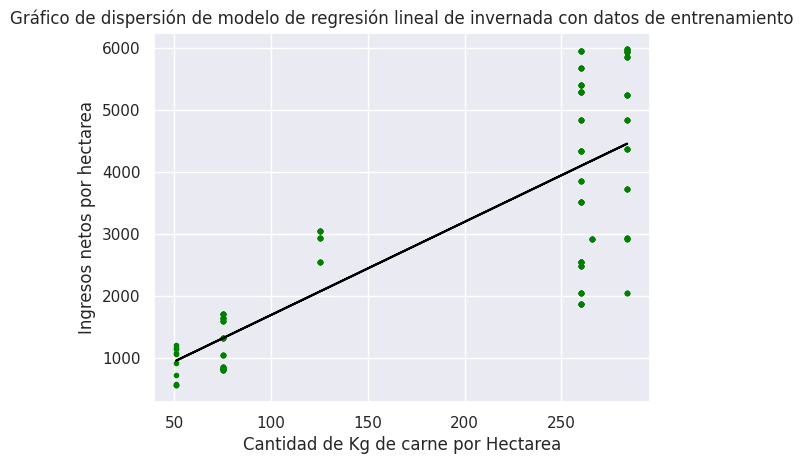

In [113]:
viz_train = plt
viz_train.scatter(X_inv_train, y_inv_train, marker=".", color= "green")
viz_train.plot(X_inv_train, lr.predict(X_inv_train), color= "black")
plt.title("Gráfico de dispersión de modelo de regresión lineal de invernada con datos de entrenamiento")
plt.xlabel ("Cantidad de Kg de carne por Hectarea")
plt.ylabel ("Ingresos netos por hectarea")

In [114]:
#Modelo de regresión lineal para Invernada, sin estandarizar. Datos de testeo
lr.fit(X_inv_test,y_inv_test)

y_pred_inv2 = lr.predict(X_inv_train)



Text(0, 0.5, 'Ingresos netos por hectarea')

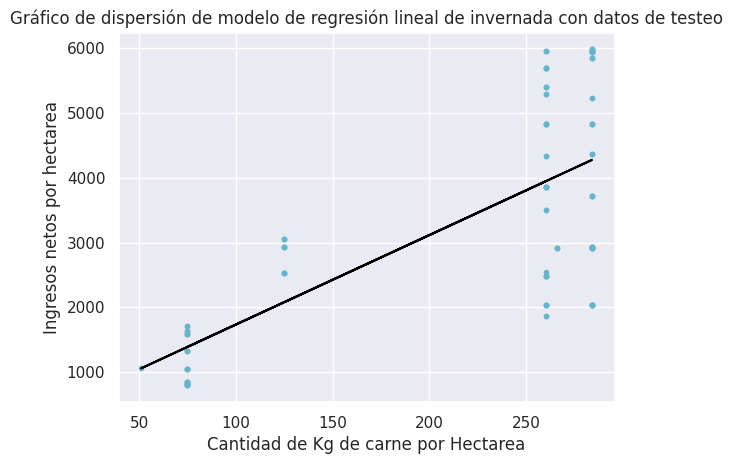

In [115]:
#Gráfico de regresión lineal para Invernada, sin estandarizar. Datos de testeo

viz_train = plt
viz_train.scatter(X_inv_test, y_inv_test, marker=".", color= "c")
viz_train.plot(X_inv_test, lr.predict(X_inv_test), color= "black")
plt.title("Gráfico de dispersión de modelo de regresión lineal de invernada con datos de testeo")
plt.xlabel ("Cantidad de Kg de carne por Hectarea")
plt.ylabel ("Ingresos netos por hectarea")

In [116]:
#Modelo de regresión lineal para Invernada. Datos de entrenamiento estandarizados.

Ingresos_inv2= Scaler.fit_transform(Ingresos_inv)
Producción_inv2= Scaler.fit_transform(Producción_inv)

X_inv_train2,X_inv_test2,y_inv_train2,y_inv_test2 = train_test_split(Producción_inv2, Ingresos_inv2,test_size=0.3,random_state=45)

lr.fit(X_inv_train2,y_inv_train2)

y_pred_inv3 = lr.predict(X_inv_test2)

Text(0, 0.5, 'Ingresos netos por hectarea')

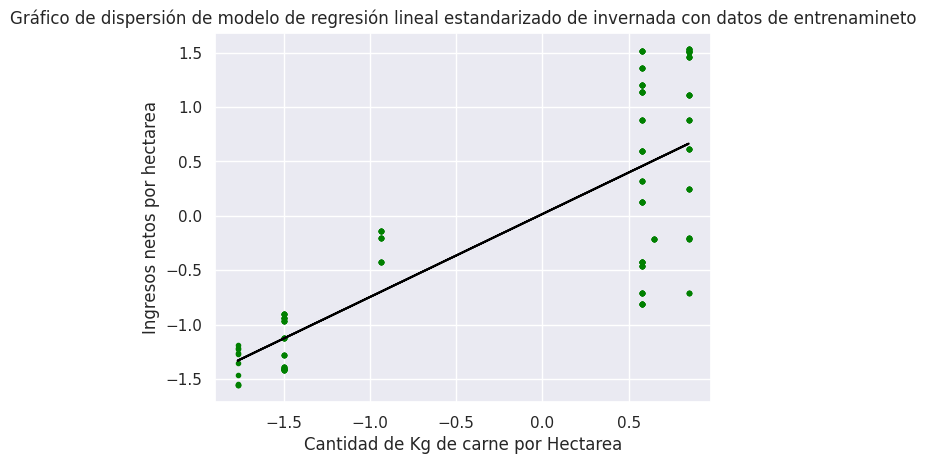

In [117]:
#Gráfico de regresión lineal para Invernada. Datos de entrenamiento estandarizados.

viz_train = plt
viz_train.scatter(X_inv_train2, y_inv_train2,marker=".", color= "green")
viz_train.plot(X_inv_train2, lr.predict(X_inv_train2), color= "black")
plt.title("Gráfico de dispersión de modelo de regresión lineal estandarizado de invernada con datos de entrenamineto")
plt.xlabel ("Cantidad de Kg de carne por Hectarea")
plt.ylabel ("Ingresos netos por hectarea")

In [118]:
#Modelo de regresión lineal para Invernada. Datos de testeo estandarizados.
lr.fit(X_inv_test2,y_inv_test2)

y_pred_inv4 = lr.predict(X_inv_train2)

Text(0, 0.5, 'Ingresos netos por hectarea')

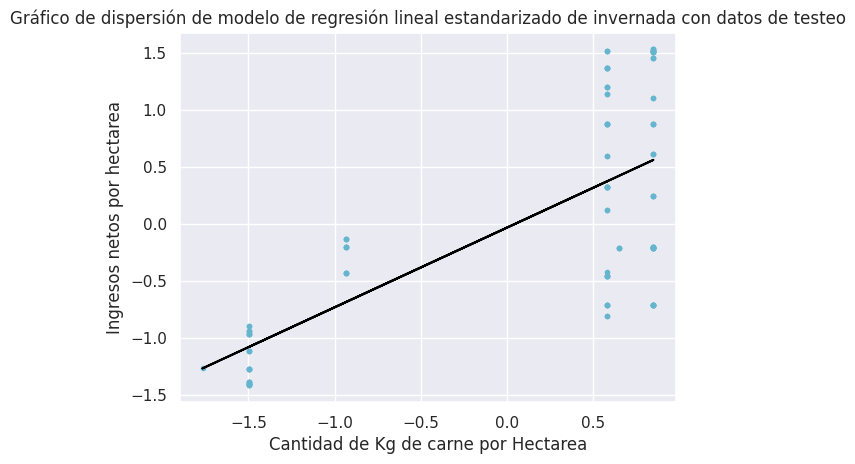

In [119]:
#Gráfico de regresión lineal para Invernada. Datos de testeo estandarizados.

viz_train = plt
viz_train.scatter(X_inv_test2, y_inv_test2, marker=".", color= "c")
viz_train.plot(X_inv_test2, lr.predict(X_inv_test2), color= "black")
plt.title("Gráfico de dispersión de modelo de regresión lineal estandarizado de invernada con datos de testeo")
plt.xlabel ("Cantidad de Kg de carne por Hectarea")
plt.ylabel ("Ingresos netos por hectarea")

In [120]:
print ("Metricas de ciclo completo, datos de entrenamiento sin estandarizar.")
print ()
print("MAE",mean_absolute_error(y_inv_train,y_pred_inv2).round(2))
print("RMSE", np.sqrt(mean_squared_error(y_inv_train,y_pred_inv2)).round(2))
r2_inv_entrenamiento1 = r2_score(y_inv_train,y_pred_inv2).round(2)
print("R2_ciclo",r2_inv_entrenamiento1)
print()
print ("Metricas de ciclo completo, datos de entrenamiento estandarizados.")
print ()
print("MAE",mean_absolute_error(y_inv_train2,y_pred_inv4).round(2))
print("RMSE", np.sqrt(mean_squared_error(y_inv_train2,y_pred_inv4)).round(2))
r2_inv_entrenamiento2 = r2_score(y_inv_train2,y_pred_inv4).round(2)
print("R2_ciclo",r2_inv_entrenamiento2)

Metricas de ciclo completo, datos de entrenamiento sin estandarizar.

MAE 971.95
RMSE 1161.01
R2_ciclo 0.57

Metricas de ciclo completo, datos de entrenamiento estandarizados.

MAE 0.55
RMSE 0.66
R2_ciclo 0.57


In [121]:
print ("Metricas de ciclo completo, datos de testeo sin estandarizar.")
print ()
print("MAE",mean_absolute_error(y_inv_test,y_pred_inv1).round(2))
print("RMSE", np.sqrt(mean_squared_error(y_inv_test,y_pred_inv1)).round(2))
r2_inv_entrenamiento1 = r2_score(y_inv_test,y_pred_inv1).round(2)
print("R2_ciclo",r2_inv_entrenamiento2)
print()
print ("Metricas de ciclo completo, datos de testeo estandarizados.")
print ()
print("MAE",mean_absolute_error(y_inv_test2,y_pred_inv3).round(2))
print("RMSE",  np.sqrt(mean_squared_error(y_inv_test2,y_pred_inv3)).round(2))
r2_inv_entrenamiento2 = r2_score(y_inv_test2,y_pred_inv3).round(2)
print("R2_ciclo",r2_inv_entrenamiento2)

Metricas de ciclo completo, datos de testeo sin estandarizar.

MAE 1027.23
RMSE 1230.11
R2_ciclo 0.57

Metricas de ciclo completo, datos de testeo estandarizados.

MAE 0.58
RMSE 0.7
R2_ciclo 0.49


**En cuanto al modelo de regresión lineal aplicado a la actividad de invernada, es aquí donde se muestra menos efectivo tal modelo. La relación lineal positiva esta en gran medida puesta en duda. La varianza de los residuales no sigue una lógica coherente, al menos desde la perspectiva de linealidad entre mayor cantidad de producción de kg de carne e ingresos. La homocestaticidad no existe en esta distribución, que esta lejos de ser normal.**

**Esto se puede observar claramente en las metricas utilizadas. En cuanto al error absoluto medio, se observa una diferencia entre valores predichos y previstos de 0.55-0.58 (entre 971 y 1027 pesos en los datos sin estandarizar). Una diferencia muy alta entre lo posible de predecir y lo que realmente se observa**

**Un error aún más elevado se puede observar en el RMSE, que se ubica entre el 0.66 y 0.70 (alrededor de 1161 y 1230 pesos en los datos sin estandarizar)**

**Además, este modelo es el que tiene el R2 más bajo de las tres actividades, explicando la relación entre estas dos variables una varianza de un 57% en los datos de entrenamiento, y un 49% en los datos de testeo. Probablemente, se necesitaría algunas variables más para poder explicar la diferencia entre ingresos, no bastante una regresión lineal como modelo de predicción efectivo para este tipo de actividad**  



# Conclusiones Finales

In [128]:
print ("Predicción de media de ingresos netos por hectarea, según tipo de actividad. Modelos de regresión lineal, datos de entrenamiento")
print ()
print ("Cria:","$",y_pred_cria1.mean().round(2))
print ("Ciclo completo:", "$", y_pred_ciclo1.mean().round(2))
print ("Invernada", "$", y_pred_inv1.mean().round(2))
print()
print ("Media de ingresos netos por hectarea según tipo de actividad. Datos del dataset.")
print ()
mean_ing

Predicción de media de ingresos netos por hectarea, según tipo de actividad. Modelos de regresión lineal, datos de entrenamiento

Cria: $ 1074.09
Ciclo completo: $ 2042.88
Invernada $ 3409.65

Media de ingresos netos por hectarea según tipo de actividad. Datos del dataset.



actividad
cria              1084.96
ciclo completo    2034.77
invernada         3290.78
Name: Ingreso neto ($/ha), dtype: float64

In [129]:
print ("Predicción de media de ingresos netos por hectarea, según tipo de actividad. Modelos de regresión lineal, datos de testeo")
print ()
print ("Cria:","$",y_pred_cria_2.mean().round(2))
print ("Ciclo completo:", "$", y_pred_ciclo2.mean().round(2))
print ("Invernada", "$", y_pred_inv2.mean().round(2))
print()
print ("Media de ingresos netos por hectarea según tipo de actividad. Datos del dataset.")
print ()
mean_ing

Predicción de media de ingresos netos por hectarea, según tipo de actividad. Modelos de regresión lineal, datos de testeo

Cria: $ 1091.58
Ciclo completo: $ 1980.35
Invernada $ 3195.23

Media de ingresos netos por hectarea según tipo de actividad. Datos del dataset.



actividad
cria              1084.96
ciclo completo    2034.77
invernada         3290.78
Name: Ingreso neto ($/ha), dtype: float64

In [130]:
print ("Suma de ingresos netos por tipo de actividad según modelos de regresión lineal. Suma de datos de entrenamiento y de testeo")
print ()
print ("Ciclo completo:", "$", (y_pred_ciclo1.sum()+y_pred_ciclo2.sum()).round(2))
print ("Cria:","$",(y_pred_cria1.sum()+y_pred_cria_2.sum()).round(2))
print ("Invernada", "$", (y_pred_inv1.sum()+y_pred_inv2.sum()).round(2))
print()
print ("Suma de ingresos netos por tipo de actividad según dataset")
print ()
suma_ing_act

Suma de ingresos netos por tipo de actividad según modelos de regresión lineal. Suma de datos de entrenamiento y de testeo

Ciclo completo: $ 731686.0
Cria: $ 1955400.97
Invernada $ 1408213.96

Suma de ingresos netos por tipo de actividad según dataset



actividad
ciclo completo     744726
cria              1952935
invernada         1421619
Name: Ingreso neto ($/ha), dtype: int64

In [131]:
df_predcria= pd.DataFrame(y_pred_cria1)
df_predcria2 = pd.DataFrame (y_pred_cria_2)
df_predcic = pd.DataFrame (y_pred_ciclo1)
df_predcic2 = pd.DataFrame (y_pred_ciclo2)

print ("Mediana de ingresos netos en Modelo de predicción de cría. Datos de entrenamiento:", df_predcria.median().round(2))
print()
print ("Mediana de ingresos netos en Modelo de predicción de cría. Datos de testeo:",df_predcria2.median().round(2))
print()
print ("Mediana de ingresos netos en Modelo de predicción de Ciclo completo. Datos de Entrenamiento:",df_predcic.median().round(2))
print ()
print ("Mediana de ingresos netos en Modelo de predicción de Ciclo Completo. Datos de testeo:",df_predcic2.median().round(2))


Mediana de ingresos netos en Modelo de predicción de cría. Datos de entrenamiento: 0    703.18
dtype: float64

Mediana de ingresos netos en Modelo de predicción de cría. Datos de testeo: 0    701.33
dtype: float64

Mediana de ingresos netos en Modelo de predicción de Ciclo completo. Datos de Entrenamiento: 0    1489.79
dtype: float64

Mediana de ingresos netos en Modelo de predicción de Ciclo Completo. Datos de testeo: 0    1415.26
dtype: float64


In [132]:
df_filt_bsas1 = df_filtrado.loc[df_filtrado["Provincia"] == "Buenos Aires"]
df_filt_bsas2 = df_filtrado2.loc[df_filtrado2["Provincia"] == "Buenos Aires"]

mean_prod_bsas = df_filt_bsas1["Producción (kg/ha)"].mean().round(2)
median_prod_bsas = df_filt_bsas1["Producción (kg/ha)"].median().round(2)
mean_prod_bsas2 = df_filt_bsas2["Producción (kg/ha)"].mean().round(2)
median_prod_bsas2 = df_filt_bsas2["Producción (kg/ha)"].median().round(2)

print ("Media de producción de kg de carne en la actividad de cría en Buenos Aires:", mean_prod_bsas)
print()
print ("Mediana de producción de kg de carne en la actividad de cría en Buenos Aires:",median_prod_bsas)
print()
print ("Media de producción de kg de carne en la actividad de ciclo completo en Buenos Aires:", mean_prod_bsas2)
print()
print ("Mediana de producción de kg de carne en la actividad de ciclo completo en Buenos Aires:",median_prod_bsas2)

Media de producción de kg de carne en la actividad de cría en Buenos Aires: 92.0

Mediana de producción de kg de carne en la actividad de cría en Buenos Aires: 92.0

Media de producción de kg de carne en la actividad de ciclo completo en Buenos Aires: 83.88

Mediana de producción de kg de carne en la actividad de ciclo completo en Buenos Aires: 65.0


In [133]:
mean_ing_bsas = df_filt_bsas1["Ingreso neto ($/ha)"].mean().round(2)
median_ing_bsas = df_filt_bsas1["Ingreso neto ($/ha)"].median().round(2)
mean_ing_bsas2 = df_filt_bsas2["Ingreso neto ($/ha)"].mean().round(2)
median_ing_bsas2 = df_filt_bsas2["Ingreso neto ($/ha)"].median().round(2)

print ("Media de ingresos en la actividad de cría en Bs.As:", "$", mean_ing_bsas)
print()
print ("Mediana de ingresos en la actividad de cría en Bs.As:","$",median_ing_bsas)
print()
print ("Media de ingresos en la actividad de ciclo completo en Bs.As:","$", mean_ing_bsas2)
print()
print ("Mediana de ingresos en la actividad de ciclo completo en Bs.As:","$",median_ing_bsas2)


Media de ingresos en la actividad de cría en Bs.As: $ 2282.92

Mediana de ingresos en la actividad de cría en Bs.As: $ 2326.5

Media de ingresos en la actividad de ciclo completo en Bs.As: $ 1922.78

Mediana de ingresos en la actividad de ciclo completo en Bs.As: $ 1744.0


**Conclusión Final**


**Considerando los modelos implementados, se puede decir que implementar un modelo de regresión lineal para el conjunto de datos la producción de carne bovina no es apropiado, dado que hay una diferencia demasiado grande entre los datos pertenecientes a la Cría de ganado, siendo escasos los datos de la actividad de Ciclo Completo y de Invernada. Además, considerando el conjunto de los datos, se puede observar que hay un problema  de homocedasticidad, ya que existe una diferencia importante en la variabilidad de los residuos en la medida que aumenta la producción de kg de carne, lo que implica la necesidad de considerar mas variables con otro tipo de modelo para ofrecer mayor precisión en la predicción.**

**Esto queda claro cuando se aplican modelos de regresión para cada actividad particular. El modelo de regresión lineal aplicado para la actividad "Cría" tiene un nivel de error bastante más bajo que las otras actividades. Aplicado solamente para ese tipo de actividad, se puede decir que el modelo de regresión lineal es efectivo y sirve como predictor para calcular los ingresos netos de una inversión productiva en tal actividad. Cabe tener en cuenta que, al carecer las diferentes medidas una distribución normal, para considerar una producción de kg de carne estandar en la actividad "Cría" pareciera ser más util la mediana que la media.**

**Como se ha visto en el desarrollo del análisis, si bien la hipotesis de que existe un mayor ingreso neto total en la cría se puede comprobar facilmente, dado que alrededor del 75% de los establecimientos pertenecen a la actividad de "cría", si se considera la media de ingresos netos, la misma es más importante para las otras dos actividades.**

**Ahora bien, si consideramos las ganancias totales (es decir, restando a los ingresos los gastos de la producción), la media y la mediana de la actividad "Cria" es más alta que la de "Invernada", y algo menor comparada con la actividad de ciclo completo. Comparando particularmente en la provincia de Bs.As, la media y mediana de la actividad "Cría" son más altas que la actividaden de "ciclo completo" tanto en los ingresos netos como en la producción de kg de carne por hectarea.**

**Siguiendo el modelo de regresión lineal de la actividad  "cría", es posible percibir que la mediana de ingresos se ubica entre los 701 y 703 pesos por hectarea. Para llegar a tal monto habría que producir menos de 40 kg de carne bovina por hectarea, lo cual es un objetivo mínimo alcanzable, teniendo en cuenta que la mediana de producción de Kg de carne es de 30 kg, y la media de 45 kg. Estas cifras suben a 92 kg en la producción de la provincia de Bs.As.**

**En definitiva, por las limitaciones que tienen algunos de los modelos de regresión lineal, por las cáracteristicas que se pudo considerar en el analisis descriptivo de los datos de gastos y ganancias totales, lo recomendable sería iniciar una inversión en la provincia de Buenos Aires que impulse una producción con un tipo de actividad de "Cría", para acumular fondos que permitan luego hacer inversiones en producciones con actividad de "Ciclo Completo".**

**Esta recomendación se da por las facilidades ofrece la actividad de "Cria", al ser una actividad con pocos gastos, por su mayor grado de predicibilidad, dado la relación directa entre aumento de ingresos y aumento de producción de carne, así como por el menor piso de produccción de carne que habría que alcanzar para obtener un ingreso medio, lo que implicaría una menor inversión para comenzar a a producir. En la medida que se asentara la actividad de cría de ganado, se podría empezar a explorar nuevos datos o nuevos modelos de predicción, que permitan precisar y caracterizar de mejor manera a la actividad de "Ciclo Completo" que tiende a tener una ganancia media más alta, con menor riesgo que la ofrecida por la actividad de "Invernada".**






